# Projet Data Science - Simulateur de DPE
## ENSAE Paris - 2A

Membres du groupe : 
- Wiam LACHQER , Amine RAZIG , Julien BOUDIER

Ce projet Python a été créé dans le but de fournir des visualisations variées des données et de mettre en place un simulateur de Diagnostic de Performance Energétique (DPE) à partir de la base de données de l'ADEME (Agence de la Transition Écologique).

## Objectifs du Projet

1. **Visualisations de Données :** Le projet propose différentes visualisations des données issues de la base de l'ADEME. Ces visualisations permettent une compréhension approfondie des caractéristiques énergétiques des logements.

2. **Simulateur de DPE :** Un simulateur de DPE a été développé en utilisant les données de l'ADEME. Ce simulateur permet d'estimer la performance énergétique d'un logement en fonction de divers paramètres.

In [1]:
pip install requests


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 3.5 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importation des bibliothèques qu’on va utiliser
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Fonction qui permet d’explorer les données

def create_unique(df):
        
    df_unique = pd.DataFrame(columns=['Column_name','Data_type', 'Number_of_unique','Number_of_missing', 'Unique_values'])

    # loop through the columns in the other dataframe
    for col in df.columns:
        # get the number of unique values in the column
        num_unique = df[col].nunique()

        # add the unique values as a list to the 'Unique_values' column if num_unique <= 5
        if num_unique <= 15:
            unique_vals = list(df[col].unique())
        else:
            unique_vals = "More than 15 unique values"

        # get the data type of the column
        data_type = df[col].dtype

        # count the number of missing values in the column
        num_missing = df[col].isnull().sum()

        # append a row to the empty dataframe with the column name, number of unique values, unique values, and data type
        df_unique = pd.concat([df_unique,pd.DataFrame([{'Column_name': col, 'Number_of_unique': num_unique, 'Unique_values': unique_vals, 'Data_type':
                                      data_type, 'Number_of_missing': num_missing}])])
    return df_unique

Le simulateur de DPE en fonction d’informations accessibles pour le propriétaire et le locataire: 

In [3]:
#Importation des colonnes utilisées pour la simulation

url_api = "https://koumoul.com/data-fair/api/v1/datasets/dpe-v2-logements-existants/lines?size=10000&select=Etiquette_DPE%2CType_b%C3%A2timent%2CP%C3%A9riode_construction%2CHauteur_sous-plafond%2CSurface_habitable_logement%2CCode_postal_(brut)%2CType_%C3%A9nergie_n%C2%B01%2CType_%C3%A9nergie_n%C2%B02%2CType_%C3%A9nergie_n%C2%B03%2CIsolation_toiture_(0%2F1)%2CQualit%C3%A9_isolation_murs%2CQualit%C3%A9_isolation_plancher_bas%2CType_%C3%A9nergie_principale_chauffage%2CType_%C3%A9nergie_principale_ECS%2CType_ventilation"
req = requests.get(url_api)
wb = req.json()
df = pd.json_normalize(wb["results"])
df


,Type_énergie_n°3,Type_énergie_n°1,Type_énergie_n°2,Type_ventilation,Isolation_toiture_(0/1),Qualité_isolation_plancher_bas,Qualité_isolation_murs,Hauteur_sous-plafond,Surface_habitable_logement,Code_postal_(brut),Période_construction,Type_bâtiment,Type_énergie_principale_ECS,Type_énergie_principale_chauffage,Etiquette_DPE,_score
0,Électricité,Gaz naturel,Bois – Bûches,Ventilation par ouverture des fenêtres,False,très bonne,insuffisante,2.9,220.8,25000,avant 1948,appartement,Gaz naturel,Gaz naturel,D,None
1,NaN,Gaz naturel,Électricité,NaN,NaN,insuffisante,insuffisante,2.5,51.0,56600,1948-1974,appartement,Gaz naturel,Électricité,D,None
2,NaN,Réseau de Chauffage urbain,Électricité,VMC SF Hygro B après 2012,NaN,moyenne,insuffisante,2.5,61.0,78360,1948-1974,appartement,Réseau de Chauffage urbain,Réseau de Chauffage urbain,C,None
3,Électricité,Réseau de Chauffage urbain,Gaz naturel,NaN,NaN,insuffisante,insuffisante,2.5,47.5,44800,1975-1977,appartement,NaN,NaN,C,None
4,NaN,Gaz naturel,Électricité,NaN,NaN,insuffisante,insuffisante,2.5,47.0,75018,avant 1948,appartement,Électricité,Électricité,G,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,Gaz naturel,Électricité,VMC SF Hygro A de 2001 à 2012,True,moyenne,moyenne,2.6,83.8,62149,avant 1948,maison,Gaz naturel,Gaz naturel,D,None
9996,NaN,Gaz naturel,Gaz naturel,NaN,NaN,insuffisante,insuffisante,2.5,84.2,62400,1948-1974,maison,Gaz naturel,Gaz naturel,E,None
9997,NaN,Gaz naturel,Électricité,VMC Basse pression Hygro A,NaN,insuffisante,insuffisante,2.5,66.0,92500,1948-1974,appartement,Gaz naturel,Gaz naturel,D,None
9998,NaN,Gaz naturel,Électricité,VMC SF Auto réglable de 2001 à 2012,True,moyenne,moyenne,2.5,73.1,28630,2001-2005,maison,Gaz naturel,Gaz naturel,D,None


In [4]:
create_unique(df)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Unique_values
0,Type_énergie_n°3,object,11,7639,"[Électricité, nan, Bois – Bûches, GPL, Gaz nat..."
0,Type_énergie_n°1,object,11,0,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."
0,Type_énergie_n°2,object,13,1725,"[Bois – Bûches, Électricité, Gaz naturel, nan,..."
0,Type_ventilation,object,36,3116,More than 15 unique values
0,Isolation_toiture_(0/1),object,2,6450,"[False, nan, True]"
0,Qualité_isolation_plancher_bas,object,4,101,"[très bonne, insuffisante, moyenne, bonne, nan]"
0,Qualité_isolation_murs,object,4,0,"[insuffisante, bonne, très bonne, moyenne]"
0,Hauteur_sous-plafond,float64,40,0,More than 15 unique values
0,Surface_habitable_logement,float64,1695,156,More than 15 unique values
0,Code_postal_(brut),object,2902,0,More than 15 unique values


## Mise en place de la base de données exploitable. 
L'objectif est de selectionner et de modifier certaines variables afin qu'elles puissent etre utilisées efficacement dans nos analyses.

In [5]:
# Traitement des données manquantes

# Suppression des colonnes avec plus de 60% des valeurs manquantes
df.drop(["Type_énergie_n°3","Isolation_toiture_(0/1)", "_score"], axis=1, inplace=True)

# Suppression des lignes dans lesquelles la surface habitable est non renseignée
df=df[df["Surface_habitable_logement"].notna()]
df=df[df["Qualité_isolation_plancher_bas"].notna()]

# Pour les données qui ont Type_énergie_principale_ECS=Nan ou Type_énergie_principale_chauffage=Nan, on remplit ces cases par Type_énergie_n°1
df["Type_énergie_principale_ECS"].fillna(df["Type_énergie_n°1"], inplace = True)
df["Type_énergie_principale_chauffage"].fillna(df["Type_énergie_n°1"], inplace = True)

# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_chauffage' par 'bois'
df['Type_énergie_principale_chauffage'] = df['Type_énergie_principale_chauffage'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')
# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_ECS' par 'bois'
df['Type_énergie_principale_ECS'] = df['Type_énergie_principale_ECS'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')

# La simulation portera uniquement sur les maisons et les appartements, on supprime les immeubles
df=df[df["Type_bâtiment"]!="immeuble"]

# L’encodage des variables non numériques
label_encoder = LabelEncoder()
df['Qualité_isolation_plancher_bas_encoded'] = label_encoder.fit_transform(df['Qualité_isolation_plancher_bas'])
df["Qualité_isolation_murs_encoded"] = label_encoder.fit_transform(df['Qualité_isolation_murs'])
df["Période_construction_encoded"] = label_encoder.fit_transform(df['Période_construction'])
df["Type_énergie_principale_ECS_encoded"] = label_encoder.fit_transform(df['Type_énergie_principale_ECS'])
df["Type_énergie_principale_chauffage_encoded"] = label_encoder.fit_transform(df['Type_énergie_principale_chauffage'])
df["Période_construction_encoded"] = label_encoder.fit_transform(df['Période_construction'])
df = pd.get_dummies(df, columns=['Type_bâtiment'])

df



,Type_énergie_n°1,Type_énergie_n°2,Type_ventilation,Qualité_isolation_plancher_bas,Qualité_isolation_murs,Hauteur_sous-plafond,Surface_habitable_logement,Code_postal_(brut),Période_construction,Type_énergie_principale_ECS,Type_énergie_principale_chauffage,Etiquette_DPE,Qualité_isolation_plancher_bas_encoded,Qualité_isolation_murs_encoded,Période_construction_encoded,Type_énergie_principale_ECS_encoded,Type_énergie_principale_chauffage_encoded,Type_bâtiment_appartement,Type_bâtiment_maison
0,Gaz naturel,Bois – Bûches,Ventilation par ouverture des fenêtres,très bonne,insuffisante,2.9,220.8,25000,avant 1948,Gaz naturel,Gaz naturel,D,3,1,9,6,4,True,False
1,Gaz naturel,Électricité,NaN,insuffisante,insuffisante,2.5,51.0,56600,1948-1974,Gaz naturel,Électricité,D,1,1,0,6,7,True,False
2,Réseau de Chauffage urbain,Électricité,VMC SF Hygro B après 2012,moyenne,insuffisante,2.5,61.0,78360,1948-1974,Réseau de Chauffage urbain,Réseau de Chauffage urbain,C,2,1,0,8,6,True,False
3,Réseau de Chauffage urbain,Gaz naturel,NaN,insuffisante,insuffisante,2.5,47.5,44800,1975-1977,Réseau de Chauffage urbain,Réseau de Chauffage urbain,C,1,1,1,8,6,True,False
4,Gaz naturel,Électricité,NaN,insuffisante,insuffisante,2.5,47.0,75018,avant 1948,Électricité,Électricité,G,1,1,9,9,7,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gaz naturel,Électricité,VMC SF Hygro A de 2001 à 2012,moyenne,moyenne,2.6,83.8,62149,avant 1948,Gaz naturel,Gaz naturel,D,2,2,9,6,4,False,True
9996,Gaz naturel,Gaz naturel,NaN,insuffisante,insuffisante,2.5,84.2,62400,1948-1974,Gaz naturel,Gaz naturel,E,1,1,0,6,4,False,True
9997,Gaz naturel,Électricité,VMC Basse pression Hygro A,insuffisante,insuffisante,2.5,66.0,92500,1948-1974,Gaz naturel,Gaz naturel,D,1,1,0,6,4,True,False
9998,Gaz naturel,Électricité,VMC SF Auto réglable de 2001 à 2012,moyenne,moyenne,2.5,73.1,28630,2001-2005,Gaz naturel,Gaz naturel,D,2,2,5,6,4,False,True


In [7]:
df['Qualité_isolation_plancher_bas'].unique()

bd_dpe['Type_énergie_principale_chauffage'].value_counts()

Type_énergie_principale_chauffage
Gaz naturel                                                     4025
Électricité                                                     2462
Réseau de Chauffage urbain                                      1628
Fioul domestique                                                 942
Bois                                                             375
GPL                                                              278
Propane                                                           11
Électricité d'origine renouvelable utilisée dans le bâtiment      10
Charbon                                                            5
Name: count, dtype: int64

## Analyse descriptive de la base de donnée : 
- répartition des types d'énergies principaux des logements ?
- type de chauffage utilisé en majorité selon la note de l'étiquette DPE ? 
- etiquette DPE en fonction des codes postaux (représentation cartographique ? ) rq => ajouter dans la base de donnéee les données géo
- etiquette DPE en fonction de l'année de construction ?
- surface habitable 

rq :  quels sont les variables cibles dans la base ? on cherche a prédri les consos, les émissions etc... Objectifs avec ces variables est de faire un indicateur de performanace énergétiques et ensuite de le prédire. 

Méthodologie => se baser sur la litterature pour comprendre les indicateurs majeur de performance énergetique, création de l'indice en attribuant des poids aux varaibles cibles, les normaliser ? moyenne ? 




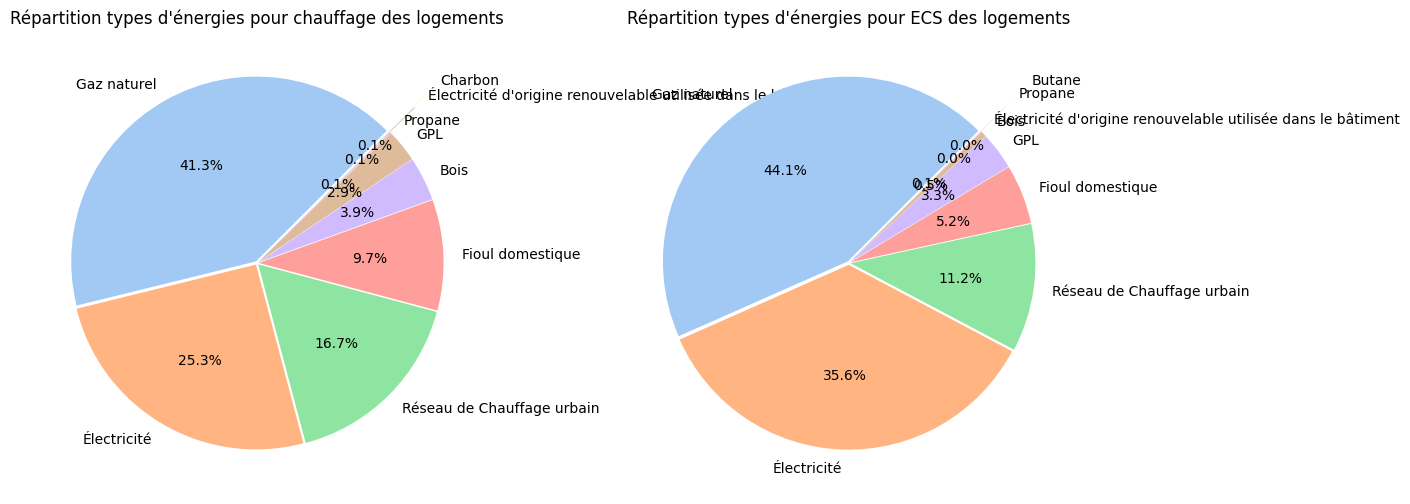

'\nplt.figure(figsize=(10, 6))\ncolors = sns.color_palette(\'pastel\')[0:len(comptage_type_energie)]\nexplode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.2,0.3)\n\ngraph = plt.pie(x=comptage_type_energie, labels = comptage_type_energie.index, startangle=45,explode = explode , colors=colors,  autopct=\'%1.1f%%\') # creation d\'un graphique à barres\nplt.title(\'Répartition types d\'energies pour chauffage des logements\')\n\n\nplt.show()\n\nfig, ax = plt.subplots()\nax.pie(x=nb1, labels=cdt1, startangle=45, explode = explode , shadow = True, autopct = lambda x: str(round(x, 2)) + \'%\')\nplt.title( \'Répartition de la gravité des accidents\')\n\nplt.figure(figsize=(10, 6))\ngraph = plt.pie(x=comptage_type_energie.values, y=comptage_type_energie.index, palette="viridis") # creation d\'un graphique à barres\n\n# Ajoutez les pourcentages à côté des barres\nfor bar, percentage in zip(graph.patches, pourcentages):\n    text_x = bar.get_width() + 0.3\n    text_y = bar.get_y() + bar.get_height() /

In [17]:
# Analyse descriptive de la base de donnée : 
bd_dpe = df.copy()

# répartition des types d'energies de chauffage  des logements : 
comptage_type_energie = bd_dpe['Type_énergie_principale_chauffage'].value_counts()


### REPRESENTATION GRAPHIQUE 
pourcentages = (comptage_type_energie / len(bd_dpe)) * 100 # Calcule des pourcentages

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


comptage_type_chauffage = bd_dpe['Type_énergie_principale_chauffage'].value_counts()  # Graphique pour 'Type_énergie_principale_chauffage'
colors_chauffage = sns.color_palette('pastel')[0:len(comptage_type_chauffage)]
explode_chauffage = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.2, 0.3)

axes[0].pie(x=comptage_type_chauffage, labels=comptage_type_chauffage.index, startangle=45, explode=explode_chauffage,
             colors=colors_chauffage, autopct='%1.1f%%')
axes[0].set_title('Répartition types d\'énergies pour chauffage des logements')


comptage_type_ECS = bd_dpe['Type_énergie_principale_ECS'].value_counts()  # Graphique pour 'type_principale_energie_ECS'
colors_ECS = sns.color_palette('pastel')[0:len(comptage_type_ECS)]
explode_ECS = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.2, 0.3)

axes[1].pie(x=comptage_type_ECS, labels=comptage_type_ECS.index, startangle=45, explode=explode_ECS,
             colors=colors_ECS, autopct='%1.1f%%')
axes[1].set_title('Répartition types d\'énergies pour ECS des logements')

# Affichage des graphiques
plt.show()


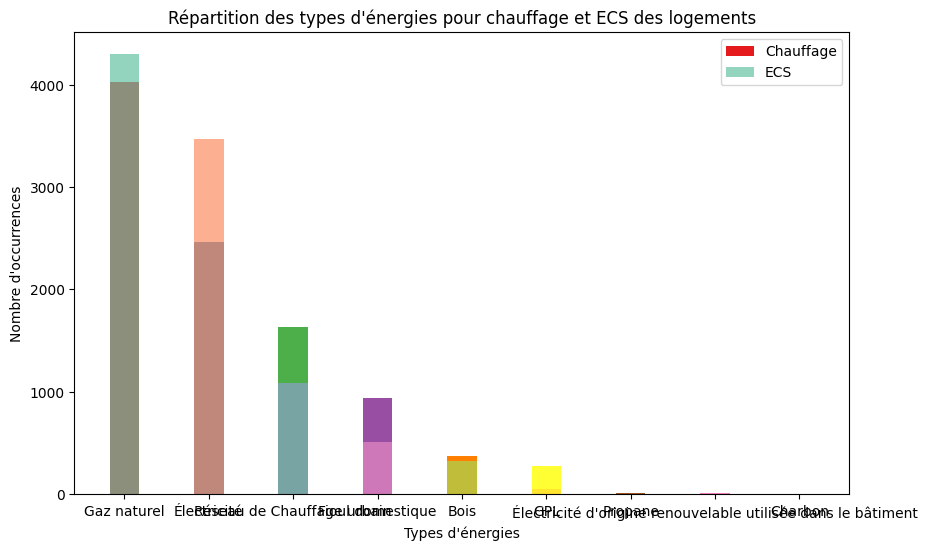

In [20]:

# TYPE DE REPRESENTATIONA REVOIR /!\ pas tres visuelle

# Comptage pour 'Type_énergie_principale_chauffage'
comptage_type_chauffage = bd_dpe['Type_énergie_principale_chauffage'].value_counts()
colors_ECS = sns.color_palette('Set2')[0:len(comptage_type_ECS)]

# Comptage pour 'type_principale_energie_ECS'
comptage_type_ECS = bd_dpe['Type_énergie_principale_ECS'].value_counts()
colors_chauffage = sns.color_palette('Set1')[0:len(comptage_type_chauffage)]

# Création du graphique en barres superposées
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(comptage_type_chauffage))

# Barres pour 'Type_énergie_principale_chauffage'
plt.bar(index, comptage_type_chauffage, bar_width, color=colors_chauffage, label='Chauffage')

# Barres pour 'type_principale_energie_ECS'
plt.bar(index, comptage_type_ECS, bar_width, color=colors_ECS, label='ECS', alpha=0.7)

# Ajout des labels, titres, et légende
plt.xlabel('Types d\'énergies')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des types d\'énergies pour chauffage et ECS des logements')
plt.xticks(index, comptage_type_chauffage.index)
plt.legend()

# Affichage du graphique
plt.show()

In [277]:
create_unique(df)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Unique_values
0,Type_énergie_n°1,object,11,0,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."
0,Type_énergie_n°2,object,10,1684,"[Bois – Bûches, Électricité, Gaz naturel, nan,..."
0,Type_ventilation,object,36,3112,More than 15 unique values
0,Qualité_isolation_plancher_bas,object,4,0,"[très bonne, insuffisante, moyenne, bonne]"
0,Qualité_isolation_murs,object,4,0,"[insuffisante, bonne, très bonne, moyenne]"
0,Hauteur_sous-plafond,float64,39,0,More than 15 unique values
0,Surface_habitable_logement,float64,1683,0,More than 15 unique values
0,Code_postal_(brut),object,2856,0,More than 15 unique values
0,Période_construction,object,10,0,"[avant 1948, 1948-1974, 1975-1977, 2006-2012, ..."
0,Type_énergie_principale_ECS,object,11,0,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."


Analyse de corrélations (via des graphes et probablement une carte)

In [262]:
# Répartition des données entre données d’entrainement et celles de validation
x=df.iloc[:,[5,6,7,12,13,14,15,16,17,19,20]]
y=df["Etiquette_DPE"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [280]:
#instanciation
model_DT = DecisionTreeClassifier()
#training
model_DT.fit(X_train, y_train)
#Prédiction
prediction = model_DT.predict(X_test)
# Evaluation
print(model_DT.score(X_train, y_train))
print(model_DT.score(X_test, y_test))

scores = cross_val_score(model_DT, x, y, cv=5)
print(scores)

# MAUVAISE PERFORMANCE (OVERFITTING)


0.990755535265921
0.4948665297741273
[0.50256674 0.48741654 0.49357987 0.46533128 0.47817155]


In [279]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster les hyperparamètres selon vos besoins

# Entraînez le classificateur sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluez les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# A REVOIR, JE COMPRENDS PAS TROP CES GRANDEURS

Accuracy: 0.5523613963039015
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
           B       0.70      0.50      0.58        32
           C       0.73      0.73      0.73       332
           D       0.50      0.60      0.54       284
           E       0.43      0.41      0.42       189
           F       0.30      0.25      0.27        72
           G       0.39      0.22      0.28        59

    accuracy                           0.55       974
   macro avg       0.43      0.39      0.40       974
weighted avg       0.55      0.55      0.55       974

Confusion Matrix:
[[  0   2   3   1   0   0   0]
 [  0  16  11   5   0   0   0]
 [  1   3 243  67  17   1   0]
 [  0   1  61 171  38  11   2]
 [  0   1   9  68  77  22  12]
 [  0   0   2  20  26  18   6]
 [  0   0   3  12  23   8  13]]
